[View in Colaboratory](https://colab.research.google.com/github/kovasb/tutorials/blob/master/Predicting1DFunctions.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!pip install XXX

12

In [0]:
!pip install tf-nightly

    100% |████████████████████████████████| 44.4MB 25kB/s 
    100% |████████████████████████████████| 81kB 7.1MB/s 
    100% |████████████████████████████████| 3.0MB 377kB/s 
  Running setup.py bdist_wheel for absl-py ... - done
  Stored in directory: /content/.cache/pip/wheels/c4/71/71/7bd70f858f062d3f99990dcbc3f45b795bde057a42f971537f
Successfully built absl-py
  Found existing installation: futures 3.0.5
    Uninstalling futures-3.0.5:
      Successfully uninstalled futures-3.0.5


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.5.0-dev20171227'

In [0]:
import tensorflow.contrib.eager as tfe


In [0]:
tfe.enable_eager_execution()


In [0]:
tf.matmul([[1, 2],
               [3, 4]],
              [[4, 5],
               [6, 7]])

<tf.Tensor: id=6, shape=(2, 2), dtype=int32, numpy=
array([[16, 19],
       [36, 43]], dtype=int32)>

In [0]:
y = tf.add(x, 1)

In [0]:
y

<tf.Tensor: id=9, shape=(2, 2), dtype=int32, numpy=
array([[17, 20],
       [37, 44]], dtype=int32)>

## Step 1: Acquire data

We want to start with some data.



In [0]:
# set of x coordinates
x = np.arange(0,100).astype(np.float32)
slope = 3
intercept = 10
# corresponding y values at given x's
y = slope*x+intercept

In [0]:
x[:10]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32)

In [0]:
y[:10]

array([ 10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.,  34.,  37.], dtype=float32)

## now we turn this into a "Dataset" that tf can read

In [0]:
input_fn = tf.estimator.inputs.numpy_input_fn({'data':x}, y, batch_size=1, shuffle=False)

In [0]:
input_fn_2 = tf.estimator.inputs.numpy_input_fn({'data':x}, None, batch_size=1, shuffle=False)

## create an estimator

In [0]:
estimator = tf.estimator.LinearRegressor(
  feature_columns = [tf.feature_column.numeric_column('data',[1])])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb0c00799d0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpOSm9uY', '_save_summary_steps': 100}


In [0]:
estimator.train(input_fn=input_fn, steps=2)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpOSm9uY/model.ckpt.
INFO:tensorflow:loss = 100.0, step = 1
INFO:tensorflow:Saving checkpoints for 2 into /tmp/tmpOSm9uY/model.ckpt.
INFO:tensorflow:Loss for final step: 163.841.


## look at predictions

In [0]:
def make_predictions(estimator, input_fn):
  y = np.concatenate(list(x['predictions'] for x in estimator.predict(input_fn=input_fn)))
  return y

In [0]:
estimator.train(input_fn=input_fn, steps=2)

NameError: ignored

In [0]:
predictions = make_predictions(estimator, input_fn)

INFO:tensorflow:Restoring parameters from /tmp/tmpOSm9uY/model.ckpt-2


In [0]:

plt.plot(predictions)
plt.ylabel('some numbers')
plt.show()

NameError: ignored

# Sin

In [0]:
# set of x coordinates
x = np.arange(0,10,0.001).astype(np.float32)
y = np.sin(x)+1

In [0]:
x.shape

(10000,)

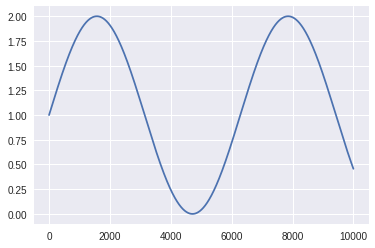

In [0]:
plt.plot(y)
plt.show()

In [0]:
estimator = tf.estimator.LinearRegressor(
  feature_columns = [tf.feature_column.numeric_column('data',[1])])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2e04acf10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpLQsHEY', '_save_summary_steps': 100}


In [0]:
estimator.train(input_fn=input_fn)

In [0]:
predictions = make_predictions(estimator, input_fn_2)

INFO:tensorflow:Restoring parameters from /tmp/tmpLQsHEY/model.ckpt-62500


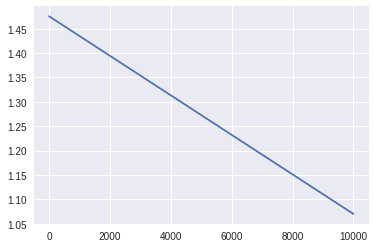

In [0]:
plt.plot(predictions)
plt.show()

In [0]:
input_fn = tf.estimator.inputs.numpy_input_fn({'data':x}, y, batch_size=8, num_epochs=10, shuffle=True)
input_fn_2 = tf.estimator.inputs.numpy_input_fn({'data':x}, None, batch_size=1, shuffle=False)

In [0]:
deep_estimator = tf.estimator.DNNRegressor(
  feature_columns = [tf.feature_column.numeric_column('data',[1])],
  hidden_units = [100,100],
  activation_fn=tf.nn.tanh)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2e03ccdd0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpF3cqGV', '_save_summary_steps': 100}


In [0]:
deep_estimator.train(input_fn=input_fn)

In [0]:
predictions = make_predictions(deep_estimator, input_fn_2)

INFO:tensorflow:Restoring parameters from /tmp/tmpF3cqGV/model.ckpt-12500


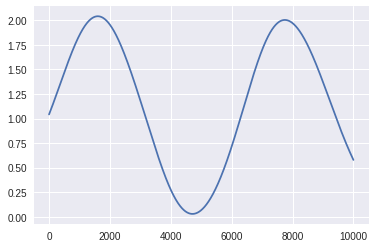

In [0]:
plt.plot(predictions)
plt.show()

# Sqrt

In [0]:
x = np.arange(0,100,0.001).astype(np.float32)
y = np.sqrt(x)

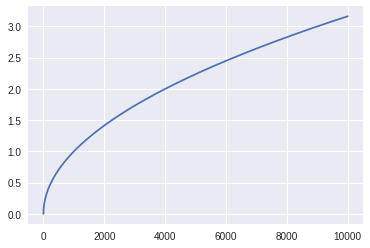

In [0]:
plt.plot(y)
plt.show()

In [0]:
input_fn = tf.estimator.inputs.numpy_input_fn({'data':x}, y, batch_size=8, num_epochs=10, shuffle=True)
input_fn_2 = tf.estimator.inputs.numpy_input_fn({'data':x}, None, batch_size=1, shuffle=False)

In [0]:
deep_estimator = tf.estimator.DNNRegressor(
  feature_columns = [tf.feature_column.numeric_column('data',[1])],
  hidden_units = [100,100],
  activation_fn=tf.nn.tanh)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2e1e9ad10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpDW3QLk', '_save_summary_steps': 100}


In [0]:
deep_estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpDW3QLk/model.ckpt.
INFO:tensorflow:loss = 57.4163, step = 1
INFO:tensorflow:global_step/sec: 681.757
INFO:tensorflow:loss = 0.0656684, step = 101 (0.151 sec)
INFO:tensorflow:global_step/sec: 942.453
INFO:tensorflow:loss = 0.0353383, step = 201 (0.106 sec)
INFO:tensorflow:global_step/sec: 999.81
INFO:tensorflow:loss = 0.035398, step = 301 (0.099 sec)
INFO:tensorflow:global_step/sec: 955.475
INFO:tensorflow:loss = 0.0181717, step = 401 (0.104 sec)
INFO:tensorflow:global_step/sec: 915.449
INFO:tensorflow:loss = 0.0513462, step = 501 (0.109 sec)
INFO:tensorflow:global_step/sec: 833.917
INFO:tensorflow:loss = 0.00407947, step = 601 (0.122 sec)
INFO:tensorflow:global_step/sec: 727.69
INFO:tensorflow:loss = 0.0145971, step = 701 (0.136 sec)
INFO:tensorflow:global_step/sec: 791.409
INFO:tensorflow:loss = 0.0021857, step = 801 (0.129 sec)
INFO:tensorflow:global_step/sec: 646.864
INFO:tensorflow:los

INFO:tensorflow:global_step/sec: 587.537
INFO:tensorflow:loss = 0.00183557, step = 3101 (0.174 sec)
INFO:tensorflow:global_step/sec: 824.715
INFO:tensorflow:loss = 0.000569671, step = 3201 (0.121 sec)
INFO:tensorflow:global_step/sec: 673.219
INFO:tensorflow:loss = 0.000450767, step = 3301 (0.148 sec)
INFO:tensorflow:global_step/sec: 589.633
INFO:tensorflow:loss = 0.000453331, step = 3401 (0.170 sec)
INFO:tensorflow:global_step/sec: 565.953
INFO:tensorflow:loss = 0.0020021, step = 3501 (0.173 sec)
INFO:tensorflow:global_step/sec: 599.977
INFO:tensorflow:loss = 0.000214403, step = 3601 (0.169 sec)
INFO:tensorflow:global_step/sec: 623.169
INFO:tensorflow:loss = 0.000234288, step = 3701 (0.160 sec)
INFO:tensorflow:global_step/sec: 579.935
INFO:tensorflow:loss = 0.000865053, step = 3801 (0.171 sec)
INFO:tensorflow:global_step/sec: 595.923
INFO:tensorflow:loss = 0.00799257, step = 3901 (0.167 sec)
INFO:tensorflow:global_step/sec: 592.322
INFO:tensorflow:loss = 0.0098418, step = 4001 (0.173 s

INFO:tensorflow:global_step/sec: 800.718
INFO:tensorflow:loss = 0.000596899, step = 6201 (0.123 sec)
INFO:tensorflow:global_step/sec: 703.982
INFO:tensorflow:loss = 0.000258436, step = 6301 (0.144 sec)
INFO:tensorflow:global_step/sec: 771.331
INFO:tensorflow:loss = 0.000588579, step = 6401 (0.127 sec)
INFO:tensorflow:global_step/sec: 676.632
INFO:tensorflow:loss = 0.00127566, step = 6501 (0.148 sec)
INFO:tensorflow:global_step/sec: 778.525
INFO:tensorflow:loss = 0.0388026, step = 6601 (0.128 sec)
INFO:tensorflow:global_step/sec: 792.531
INFO:tensorflow:loss = 0.00105274, step = 6701 (0.127 sec)
INFO:tensorflow:global_step/sec: 793.127
INFO:tensorflow:loss = 0.00312722, step = 6801 (0.126 sec)
INFO:tensorflow:global_step/sec: 761.987
INFO:tensorflow:loss = 0.00376893, step = 6901 (0.131 sec)
INFO:tensorflow:global_step/sec: 653.291
INFO:tensorflow:loss = 0.00056968, step = 7001 (0.158 sec)
INFO:tensorflow:global_step/sec: 583.748
INFO:tensorflow:loss = 0.000436153, step = 7101 (0.170 se

INFO:tensorflow:global_step/sec: 574.967
INFO:tensorflow:loss = 0.000714178, step = 9301 (0.171 sec)
INFO:tensorflow:global_step/sec: 602.824
INFO:tensorflow:loss = 0.00197725, step = 9401 (0.166 sec)
INFO:tensorflow:global_step/sec: 662.322
INFO:tensorflow:loss = 8.64006e-05, step = 9501 (0.154 sec)
INFO:tensorflow:global_step/sec: 752.066
INFO:tensorflow:loss = 0.000935336, step = 9601 (0.132 sec)
INFO:tensorflow:global_step/sec: 792.456
INFO:tensorflow:loss = 0.000845743, step = 9701 (0.127 sec)
INFO:tensorflow:global_step/sec: 703.052
INFO:tensorflow:loss = 5.47256e-05, step = 9801 (0.143 sec)
INFO:tensorflow:global_step/sec: 616.899
INFO:tensorflow:loss = 6.17433e-05, step = 9901 (0.161 sec)
INFO:tensorflow:global_step/sec: 670.012
INFO:tensorflow:loss = 9.19985e-05, step = 10001 (0.149 sec)
INFO:tensorflow:global_step/sec: 841.778
INFO:tensorflow:loss = 0.000294654, step = 10101 (0.120 sec)
INFO:tensorflow:global_step/sec: 758.259
INFO:tensorflow:loss = 0.000142975, step = 10201 

INFO:tensorflow:global_step/sec: 654.631
INFO:tensorflow:loss = 0.000164234, step = 12401 (0.153 sec)
INFO:tensorflow:Saving checkpoints for 12500 into /tmp/tmpDW3QLk/model.ckpt.
INFO:tensorflow:Loss for final step: 5.51373e-05.


In [0]:
predictions = make_predictions(deep_estimator, input_fn_2)

INFO:tensorflow:Restoring parameters from /tmp/tmpDW3QLk/model.ckpt-12500


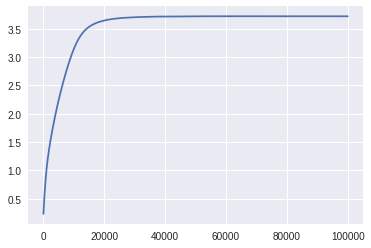

In [0]:
plt.plot(predictions)
plt.show()

# conversions

In [0]:
# features, labels = input_fn()
# estimator_spec = estimator.model_fn(features, labels, tf.estimator.ModeKeys.PREDICT, {})

In [0]:
def input_fn_to_generator(input_fn, sess):
  data, labels = input_fn()
  while True:
    try:
      yield sess.run([data, labels])
    except tf.errors.OutOfRangeError:
      raise StopIteration

In [0]:
# dont work
# g1 = input_fn_to_generator(input_fn, sess)
# g1.next()

In [0]:
def dataset_to_generator(ds, sess):
  iter = ds.make_one_shot_iterator().get_next()
  while True:
    try:
      yield sess.run([iter])
    except tf.errors.OutOfRangeError:
      raise StopIteration

In [0]:
def dataset_to_numpy(ds, sess):
  gen = dataset_to_generator(ds, sess)
  return np.concatenate(list(gen))

In [0]:
dataset_to_numpy(ds, sess)

array([1, 2, 3, 4], dtype=int32)

In [0]:
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4])
sess = tf.Session()